In [52]:
import numpy as np
import matplotlib.pyplot as plt

In [53]:
# refer to "github.com/mkolopanis/python/blob/master/radialProfile.py"

def radial_average_by_int(image, center=None):
    """
    Calculate the azimuthally averaged radial profile.
    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return radial_prof

In [60]:
# refer to "github.com/mkolopanis/python/blob/master/radialProfile.py"

def radial_average_not_by_int(image, center=None, resolution=0.15):
    """
    Calculate the azimuthally averaged radial profile.
    image - The 2D image
    center - The [x,y] pixel coordinates used as the center. The default is 
             None, which then uses the center of the image (including 
             fracitonal pixels).
    
    """
    # Calculate the indices from the image
    y, x = np.indices(image.shape)

    if not center:
        center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])

    r = np.hypot(x - center[0], y - center[1])

    # Get sorted radii
    ind = np.argsort(r.flat)
    r_sorted = r.flat[ind]
    i_sorted = image.flat[ind]
    
    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar_int = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind_int = np.where(deltar_int)[0]
    print("number of radii when each radius is integer = %d"%len(rind_int))
    deltar_real = r_sorted[1:] - r_sorted[:-1]  # Assumes all radii represented
    rind = np.where(deltar_real > 0.1)[0]       # location of changed radius
    print("number of radii when the minimum difference is less than %f = %d"%(resolution, len(rind)))
    nr = rind[1:] - rind[:-1]        # number of radius bin
    
    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]
    radial_prof = tbin / nr

    return radial_prof

In [61]:
img = np.random.randn(256, 256)
print(img.shape)

(256, 256)


In [62]:
byint = radial_average_by_int(img)
notbyint = radial_average_not_by_int(img, resolution=0.15)

number of radii when each radius is integer = 180
number of radii when the minimum difference is less than 0.150000 = 191


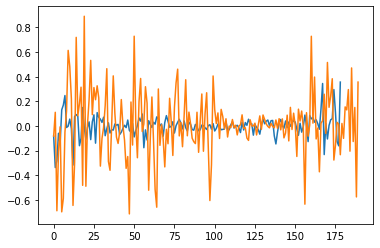

In [63]:
plt.plot(byint)
plt.plot(notbyint)
plt.show()

In [12]:
y, x = np.indices(img.shape)
print(y)
print(x)

[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [125 125 125 ... 125 125 125]
 [126 126 126 ... 126 126 126]
 [127 127 127 ... 127 127 127]]
[[  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 ...
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]
 [  0   1   2 ... 125 126 127]]


In [13]:
center = np.array([(x.max()-x.min())/2.0, (y.max()-y.min())/2.0])
print(center)

[63.5 63.5]


In [14]:
r = np.hypot(x-center[0], y-center[1])
print(r.shape)
print(r)

(128, 128)
[[89.80256121 89.09826036 88.39966063 ... 88.39966063 89.09826036
  89.80256121]
 [89.09826036 88.38834765 87.68409206 ... 87.68409206 88.38834765
  89.09826036]
 [88.39966063 87.68409206 86.97413409 ... 86.97413409 87.68409206
  88.39966063]
 ...
 [88.39966063 87.68409206 86.97413409 ... 86.97413409 87.68409206
  88.39966063]
 [89.09826036 88.38834765 87.68409206 ... 87.68409206 88.38834765
  89.09826036]
 [89.80256121 89.09826036 88.39966063 ... 88.39966063 89.09826036
  89.80256121]]


In [15]:
ind = np.argsort(r.flat)
print(ind.shape)
print(ind)

(16384,)
[ 8255  8127  8128 ...   127 16256 16383]


In [16]:
r_sorted = r.flat[ind]
i_sorted = img.flat[ind]

In [36]:
r_int = r_sorted.astype(int)
print(r_sorted[:50])
print(r_int[:50])

[0.70710678 0.70710678 0.70710678 0.70710678 1.58113883 1.58113883
 1.58113883 1.58113883 1.58113883 1.58113883 1.58113883 1.58113883
 2.12132034 2.12132034 2.12132034 2.12132034 2.54950976 2.54950976
 2.54950976 2.54950976 2.54950976 2.54950976 2.54950976 2.54950976
 2.91547595 2.91547595 2.91547595 2.91547595 2.91547595 2.91547595
 2.91547595 2.91547595 3.53553391 3.53553391 3.53553391 3.53553391
 3.53553391 3.53553391 3.53553391 3.53553391 3.53553391 3.53553391
 3.53553391 3.53553391 3.80788655 3.80788655 3.80788655 3.80788655
 3.80788655 3.80788655]
[0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [47]:
deltar = r_int[1:] - r_int[:-1]
print(deltar[:10])

[0 0 0 1 0 0 0 0 0 0]


In [49]:
deltar = r_sorted[1:] - r_sorted[:-1]
print(deltar[:10])

[0.         0.         0.         0.87403205 0.         0.
 0.         0.         0.         0.        ]


In [51]:
rind = np.where(deltar>0.15)[0]
print(rind.shape)
print(rind)

(86,)
[    3    11    15    23    31    43    51    59    67    75    79    87
    95   111   119   123   139   147   163   207   215   255   275   299
   315   331   375   391   431   447   467   483   499   523   539   607
   647   731   787   811  1019  1043  1123  1159  1175  1223  1395  1435
  1695  1787  1843  1991  2103  2127  2187  2347  2875  3435  3851  4343
  6179 14971 15199 15403 15503 15583 15675 15747 15755 15823 15887 15895
 15955 16019 16071 16119 16163 16203 16239 16271 16299 16323 16343 16359
 16371 16379]


In [48]:
rind = np.where(deltar)[0]
print(rind.shape)
print(rind)

(89,)
[    3    11    31    51    79   111   155   207   255   315   383   447
   539   615   715   811   911  1019  1123  1263  1395  1527  1663  1803
  1975  2127  2291  2471  2643  2827  3023  3227  3435  3639  3851  4059
  4303  4547  4791  5023  5283  5543  5807  6091  6375  6667  6947  7231
  7555  7859  8183  8491  8819  9175  9499  9855 10215 10579 10959 11303
 11683 12095 12491 12891 13199 13515 13787 14039 14267 14459 14687 14859
 15039 15199 15339 15487 15599 15723 15823 15923 16011 16071 16155 16203
 16271 16299 16335 16359 16371]


In [ ]:
nr = rind[1:] - rind[:-1]
print(nr)

In [ ]:
csim = np.cumsum(i_sorted, dtype=float)
print(csim.shape)
print(csim[:10])

In [ ]:
tbin = csim[rind[1:]] - csim[rind[:-1]]
print(tbin.shape)

In [ ]:
radial_profile = tbin / nr
print(radial_profile.shape)
print(radial_profile)